We will use the Yelp Review Data Set from Kaggle. https://www.kaggle.com/c/yelp-recsys-2013

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! 

In [1]:
#import the usual libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read the dataset and save the DataFrame
yelp = pd.read_csv('yelp.csv')

In [4]:
#Check info, head und describe methods to learn more about the dataset
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [16]:
#Create a new column with a length of the text in the text column
yelp['text_length'] = yelp['text'].apply(len)

# EDA

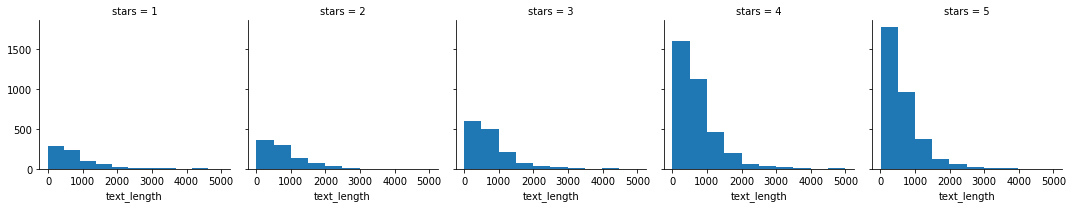

In [20]:
#Lets explore the data. We start by creating the FacetGrid to create a grid of 5 histograms of text length based off 
#of the star ratings
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text_length')

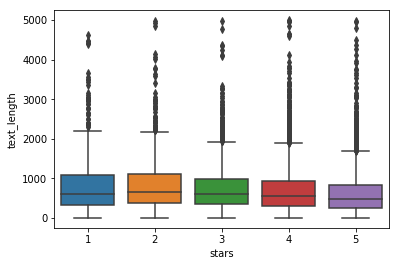

In [26]:
#Boxplot for text length of each star category:
sns.boxplot(x= yelp.stars, y= yelp.text_length)

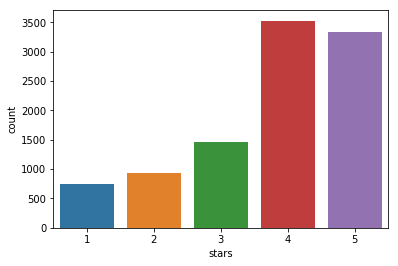

In [27]:
#Countplot for each star
sns.countplot(x= yelp.stars)

In [33]:
#Create a new DataFrame with the mean values of numerical columns of yelp
stars = yelp.groupby(by='stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [35]:
#check the correlations of the features of the new DataFrame
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


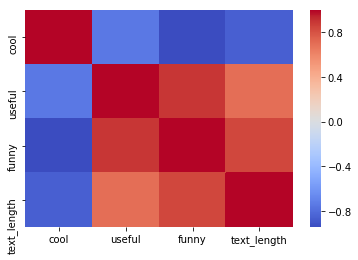

In [37]:
#Visualize it with seaborn
sns.heatmap(stars.corr(), cmap='coolwarm')

In [71]:
#Lets start the NLP Section. To make things earier lets take the 0and 5-star reviews of the original Data Frame
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5) ]

In [72]:
#Lets now create the features and target values with X and y:
X= yelp_class.text
y= yelp_class.stars

In [73]:
#Um die Häufigkeit des Vorkommen jedes Wortes in Kommentaren zu berechnen, benutzen wir CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
#Use the fit_transform Method of CountVectorizer to overwrite the X
cv = CountVectorizer()

In [75]:
X=cv.fit_transform(X)

In [76]:
#Lets now split the data into test and train samples:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
#Now its time to train the model
from sklearn.naive_bayes import MultinomialNB

In [79]:
nb = MultinomialNB()

In [80]:
#Fit nb using the training data:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
#Time to see how our model did. To do so make the predicions
predictions = nb.predict(X_test)

In [60]:
#To evaluate the predictions use the confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix


In [82]:
print(confusion_matrix(predictions, y_test))

[[159  22]
 [ 69 976]]


In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [86]:
#Nice results! What if we included a TF-IDF to this processusing a pipeline?
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

In [85]:
#import the pipeline
from sklearn.pipeline import Pipeline

In [87]:
pipeline = Pipeline([('cv', CountVectorizer()), ('tfidf', TfidfTransformer()), ('nb', MultinomialNB())]  )

In [91]:
#Lets now use our pipeline and compare the results. We have to do the train_test_split again since I overwrote the X and all the transformations are already included in the Pipeline
newX = yelp_class.text
newy= yelp_class.stars

In [92]:
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=0.3, random_state=101)

In [94]:
#fit the pipeline to the training data
pipeline.fit(newX_train, newy_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...linear_tf=False, use_idf=True)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [95]:
pipepredict = pipeline.predict(newX_test)

In [96]:
print(classification_report(pipepredict, newy_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.81      0.90      1226

   micro avg       0.81      0.81      0.81      1226
   macro avg       0.50      0.41      0.45      1226
weighted avg       1.00      0.81      0.90      1226



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [97]:
#Looks like the Tfidf just made it worth! And the optimal result could be achieved by skipping the tfidf step of the pipeline.